In [2]:
import pandas as pd
pd.options.display.html.table_schema = False

# LBNL

LBNL Provides us with 29 data points (mostly sensor readings) inside of the FCU. For this datapoints, 49 scenarios are given: 48 contain different types of potential faults in the system, and one of them "FCU_FaultFree.csv" contains no faults, representing normal data.
EDA will be performed over the fault free data, which is going to be the most generalizable for the rest of the scenarios

In [23]:
import pandas as pd

scenario = pd.read_csv(r"D:\Master\Thesis\Code\LBNL_FDD_Dataset_FCU\FCU_FaultFree.csv")
scenario

,Datetime,FCU_CTRL,FAN_CTRL,RM_TEMP,RMCLGSPT,RMHTGSPT,FCU_MAT,FCU_DAT,FCU_RAT,FCU_CVLV,...,FCU_OA_CFM,FCU_DMPR,FCU_DMPR_DM,FCU_SPD,FCU_OAT,FCU_WAT,FCU_MA_HUMD,FCU_OA_HUMD,FCU_DA_HUMD,FCU_RA_HUMD
0,01/01/2018 00:00,2,1,73.84,85.0,55.0,49.94,73.90,73.84,0.0,...,0.88,0.0,0.0,0.0,26.05,0.0,58.78,56.03,41.31,41.39
1,01/01/2018 00:01,2,1,73.84,85.0,55.0,49.94,73.90,73.84,0.0,...,0.88,0.0,0.0,0.0,26.05,0.0,58.78,56.03,41.31,41.39
2,01/01/2018 00:02,2,1,73.63,85.0,55.0,49.83,73.71,73.63,0.0,...,0.88,0.0,0.0,0.0,26.03,0.0,58.97,56.07,41.57,41.65
3,01/01/2018 00:03,2,1,73.43,85.0,55.0,49.72,73.51,73.43,0.0,...,0.88,0.0,0.0,0.0,26.02,0.0,59.15,56.10,41.84,41.91
4,01/01/2018 00:04,2,1,73.25,85.0,55.0,49.63,73.30,73.25,0.0,...,0.88,0.0,0.0,0.0,26.00,0.0,59.32,56.14,42.12,42.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,12/31/2018 23:55,2,1,60.21,85.0,55.0,33.85,51.86,60.21,0.0,...,0.88,0.0,0.0,0.0,7.49,0.0,100.00,54.91,89.80,59.13
525596,12/31/2018 23:56,2,1,60.21,85.0,55.0,33.80,51.82,60.21,0.0,...,0.88,0.0,0.0,0.0,7.40,0.0,100.00,54.92,89.95,59.14
525597,12/31/2018 23:57,2,1,60.20,85.0,55.0,33.75,51.77,60.20,0.0,...,0.88,0.0,0.0,0.0,7.31,0.0,100.00,54.93,90.11,59.15
525598,12/31/2018 23:58,2,1,60.19,85.0,55.0,33.70,51.73,60.19,0.0,...,0.88,0.0,0.0,0.0,7.22,0.0,100.00,54.94,90.26,59.16


In [4]:
# No missing values
scenario.isna().sum().sum()

0

In [5]:
# 29 DataPoints + DateTime
len(scenario.columns)

30

In [24]:
# 365 days of data, with 1 minute time-step
scenario = scenario.copy()
scenario['Datetime'] = pd.to_datetime(scenario['Datetime'])
# Get the range of days (minimum and maximum)
min_date = scenario['Datetime'].min()
max_date = scenario['Datetime'].max()

# Count the unique days
unique_days = scenario['Datetime'].dt.date.nunique()
unique_days

365

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

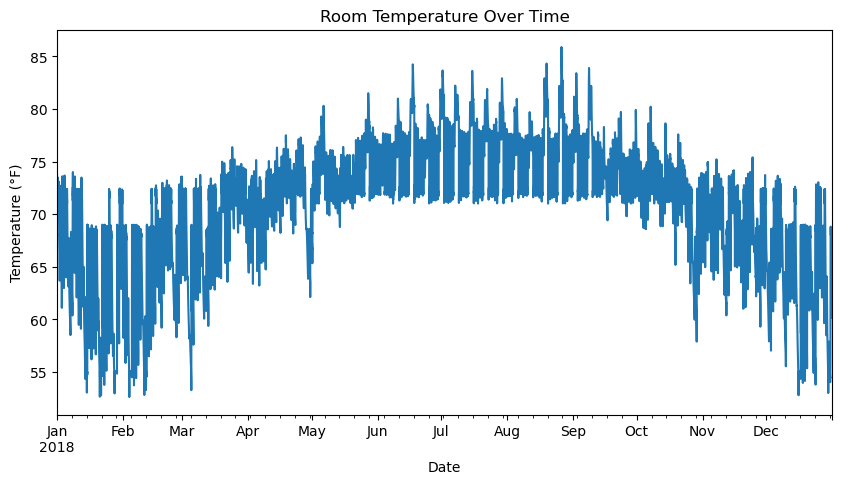

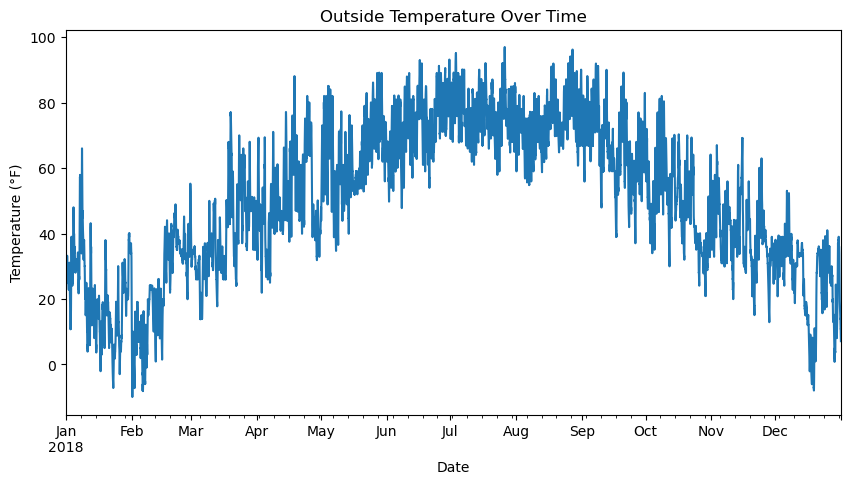

In [25]:
# Visualization of room temperature over the whole year
scenario.set_index('Datetime')['RM_TEMP'].plot(figsize=(10, 5))
plt.title("Room Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.show()

# Visualization of outside temperature over the whole year
scenario.set_index('Datetime')['FCU_OAT'].plot(figsize=(10, 5))
plt.title("Outside Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.show()

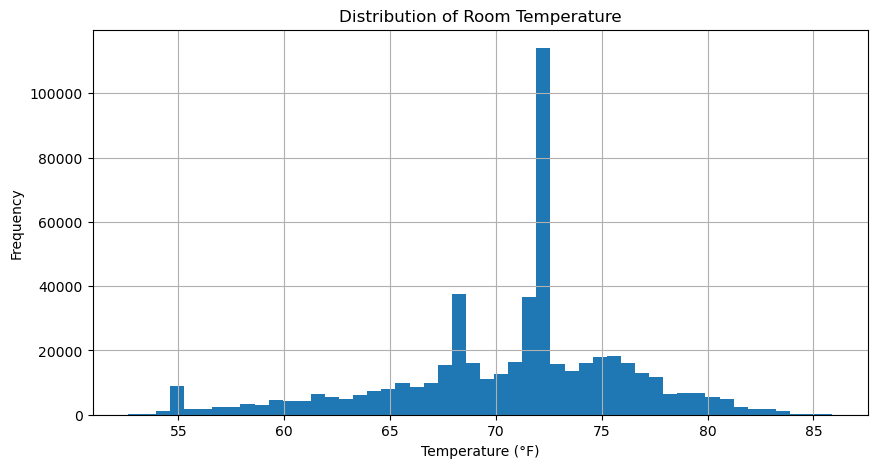

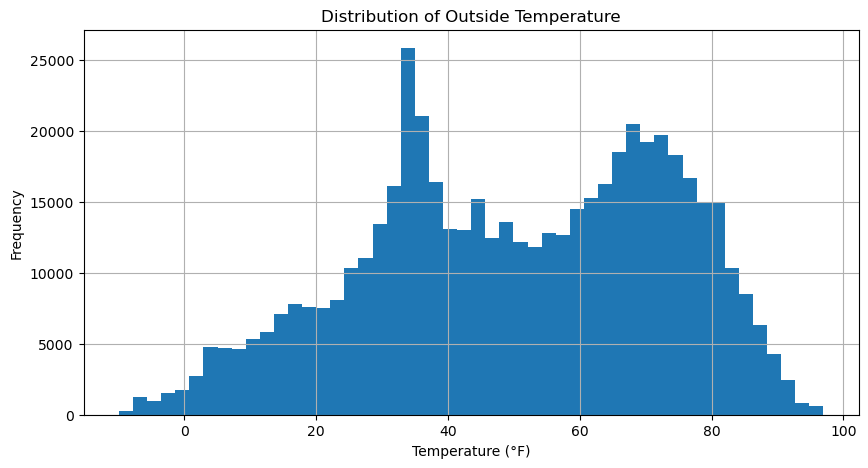

In [ ]:
# Histogram for visualizing frequency distribution of inside room temperature
scenario['RM_TEMP'].hist(bins=50, figsize=(10, 5))
plt.title("Distribution of Room Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.show()

# Histogram for visualizing frequency distribution of outside temperature
scenario['FCU_OAT'].hist(bins=50, figsize=(10, 5))
plt.title("Distribution of Outside Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.show()

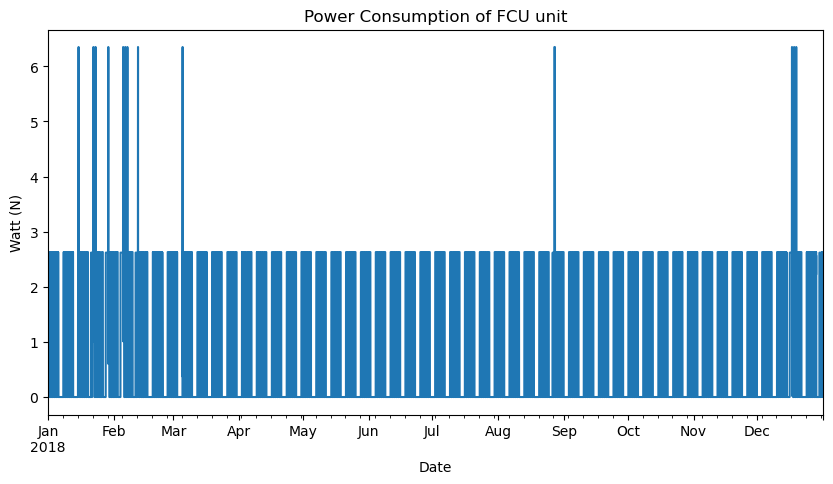

In [ ]:
# Visualization of power consumption of FCU unit
scenario.set_index('Datetime')['FCU_WAT'].plot(figsize=(10, 5))
plt.title("Power Consumption of FCU unit")
plt.xlabel("Date")
plt.ylabel("Watt (N)")
plt.show()

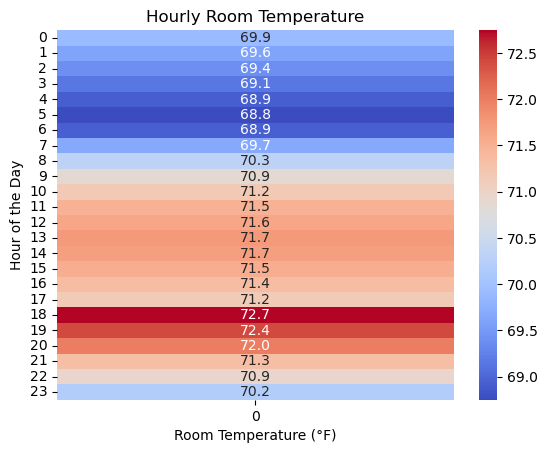

In [ ]:
# Average hourly temperature
scenario['hour'] = scenario['Datetime'].dt.hour
hourly_avg_temp = scenario.groupby('hour')['RM_TEMP'].mean()

sns.heatmap(hourly_avg_temp.values.reshape(24, 1), annot=True, cmap='coolwarm', fmt='.1f')
plt.title("Hourly Room Temperature")
plt.ylabel("Hour of the Day")
plt.xlabel("Room Temperature (°F)")
plt.show()

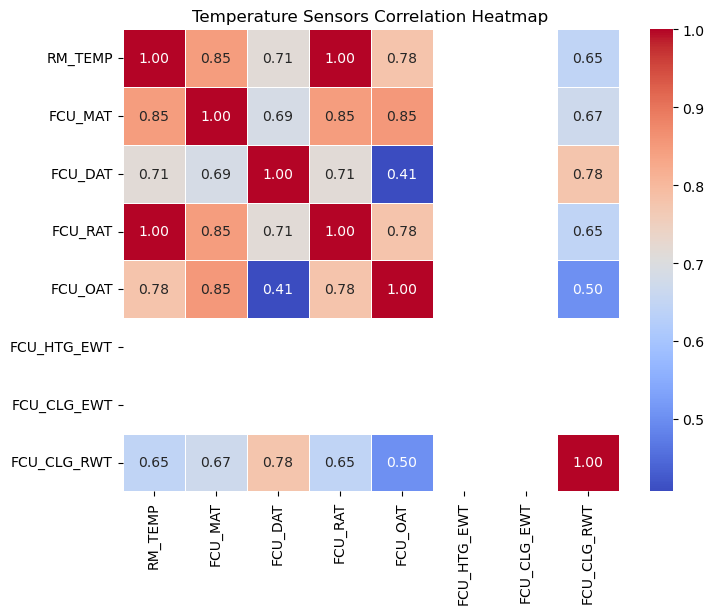

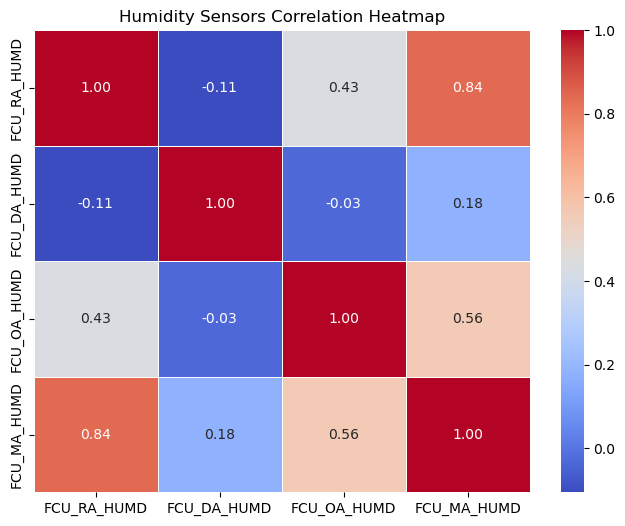

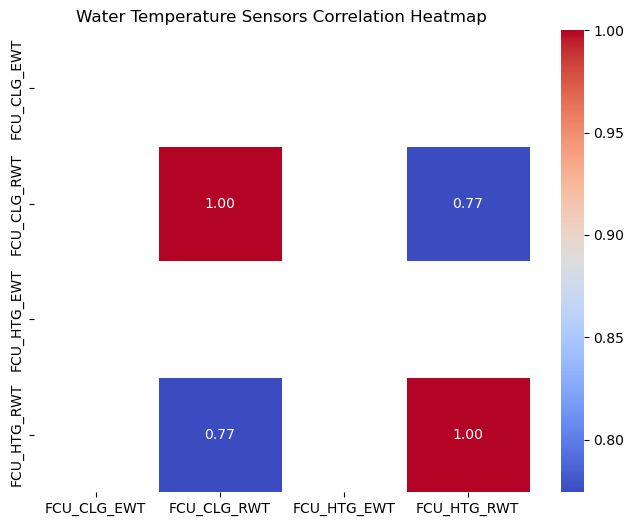

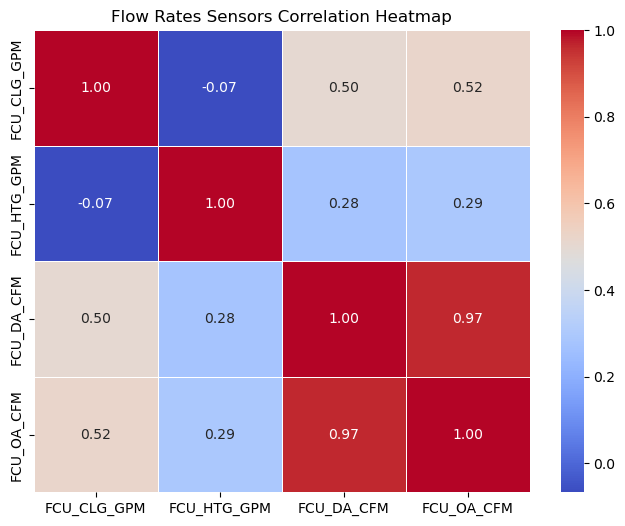

In [20]:
# Create separate heatmaps for different groups of sensors (example)
temp_sensors = ['RM_TEMP', 'FCU_MAT', 'FCU_DAT', 'FCU_RAT', 'FCU_OAT', 'FCU_HTG_EWT', 'FCU_CLG_EWT', 'FCU_CLG_RWT']
humidity_sensors = ['FCU_RA_HUMD', 'FCU_DA_HUMD', 'FCU_OA_HUMD', 'FCU_MA_HUMD']
water_temp_sensors = ['FCU_CLG_EWT', 'FCU_CLG_RWT', 'FCU_HTG_EWT', 'FCU_HTG_RWT']  # HTG_EWT and CLG_EWT have always constant values, thus appear empty in correlation matrix
flow_rates_sensors = ['FCU_CLG_GPM', 'FCU_HTG_GPM', 'FCU_DA_CFM', 'FCU_OA_CFM']

# Temperature sensors correlation heatmap
temp_corr = scenario[temp_sensors].corr()
plt.figure(figsize=(8,6))
sns.heatmap(temp_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Temperature Sensors Correlation Heatmap")
plt.show()

# Humidity sensors correlation heatmap
humidity_corr = scenario[humidity_sensors].corr()
plt.figure(figsize=(8,6))
sns.heatmap(humidity_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Humidity Sensors Correlation Heatmap")
plt.show()

# Water temperature sensors correlation heatmap
water_temp_corr = scenario[water_temp_sensors].corr()
plt.figure(figsize=(8,6))
sns.heatmap(water_temp_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Water Temperature Sensors Correlation Heatmap")
plt.show()

# Flow rates sensors correlation heatmap
flow_rates_corr = scenario[flow_rates_sensors].corr()
plt.figure(figsize=(8,6))
sns.heatmap(flow_rates_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Flow Rates Sensors Correlation Heatmap")
plt.show()

## Clean the data

In [26]:
# Identify columns with only one unique value
scenario.nunique()[scenario.nunique() == 1].index.tolist()

['FAN_CTRL', 'FCU_CLG_EWT', 'FCU_HTG_EWT']

In [27]:
scenario_clean = scenario.drop(columns = ['FAN_CTRL', 'FCU_CLG_EWT', 'FCU_HTG_EWT'])
scenario_clean

,Datetime,FCU_CTRL,RM_TEMP,RMCLGSPT,RMHTGSPT,FCU_MAT,FCU_DAT,FCU_RAT,FCU_CVLV,FCU_CVLV_DM,...,FCU_OA_CFM,FCU_DMPR,FCU_DMPR_DM,FCU_SPD,FCU_OAT,FCU_WAT,FCU_MA_HUMD,FCU_OA_HUMD,FCU_DA_HUMD,FCU_RA_HUMD
0,2018-01-01 00:00:00,2,73.84,85.0,55.0,49.94,73.90,73.84,0.0,0.0,...,0.88,0.0,0.0,0.0,26.05,0.0,58.78,56.03,41.31,41.39
1,2018-01-01 00:01:00,2,73.84,85.0,55.0,49.94,73.90,73.84,0.0,0.0,...,0.88,0.0,0.0,0.0,26.05,0.0,58.78,56.03,41.31,41.39
2,2018-01-01 00:02:00,2,73.63,85.0,55.0,49.83,73.71,73.63,0.0,0.0,...,0.88,0.0,0.0,0.0,26.03,0.0,58.97,56.07,41.57,41.65
3,2018-01-01 00:03:00,2,73.43,85.0,55.0,49.72,73.51,73.43,0.0,0.0,...,0.88,0.0,0.0,0.0,26.02,0.0,59.15,56.10,41.84,41.91
4,2018-01-01 00:04:00,2,73.25,85.0,55.0,49.63,73.30,73.25,0.0,0.0,...,0.88,0.0,0.0,0.0,26.00,0.0,59.32,56.14,42.12,42.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2018-12-31 23:55:00,2,60.21,85.0,55.0,33.85,51.86,60.21,0.0,0.0,...,0.88,0.0,0.0,0.0,7.49,0.0,100.00,54.91,89.80,59.13
525596,2018-12-31 23:56:00,2,60.21,85.0,55.0,33.80,51.82,60.21,0.0,0.0,...,0.88,0.0,0.0,0.0,7.40,0.0,100.00,54.92,89.95,59.14
525597,2018-12-31 23:57:00,2,60.20,85.0,55.0,33.75,51.77,60.20,0.0,0.0,...,0.88,0.0,0.0,0.0,7.31,0.0,100.00,54.93,90.11,59.15
525598,2018-12-31 23:58:00,2,60.19,85.0,55.0,33.70,51.73,60.19,0.0,0.0,...,0.88,0.0,0.0,0.0,7.22,0.0,100.00,54.94,90.26,59.16


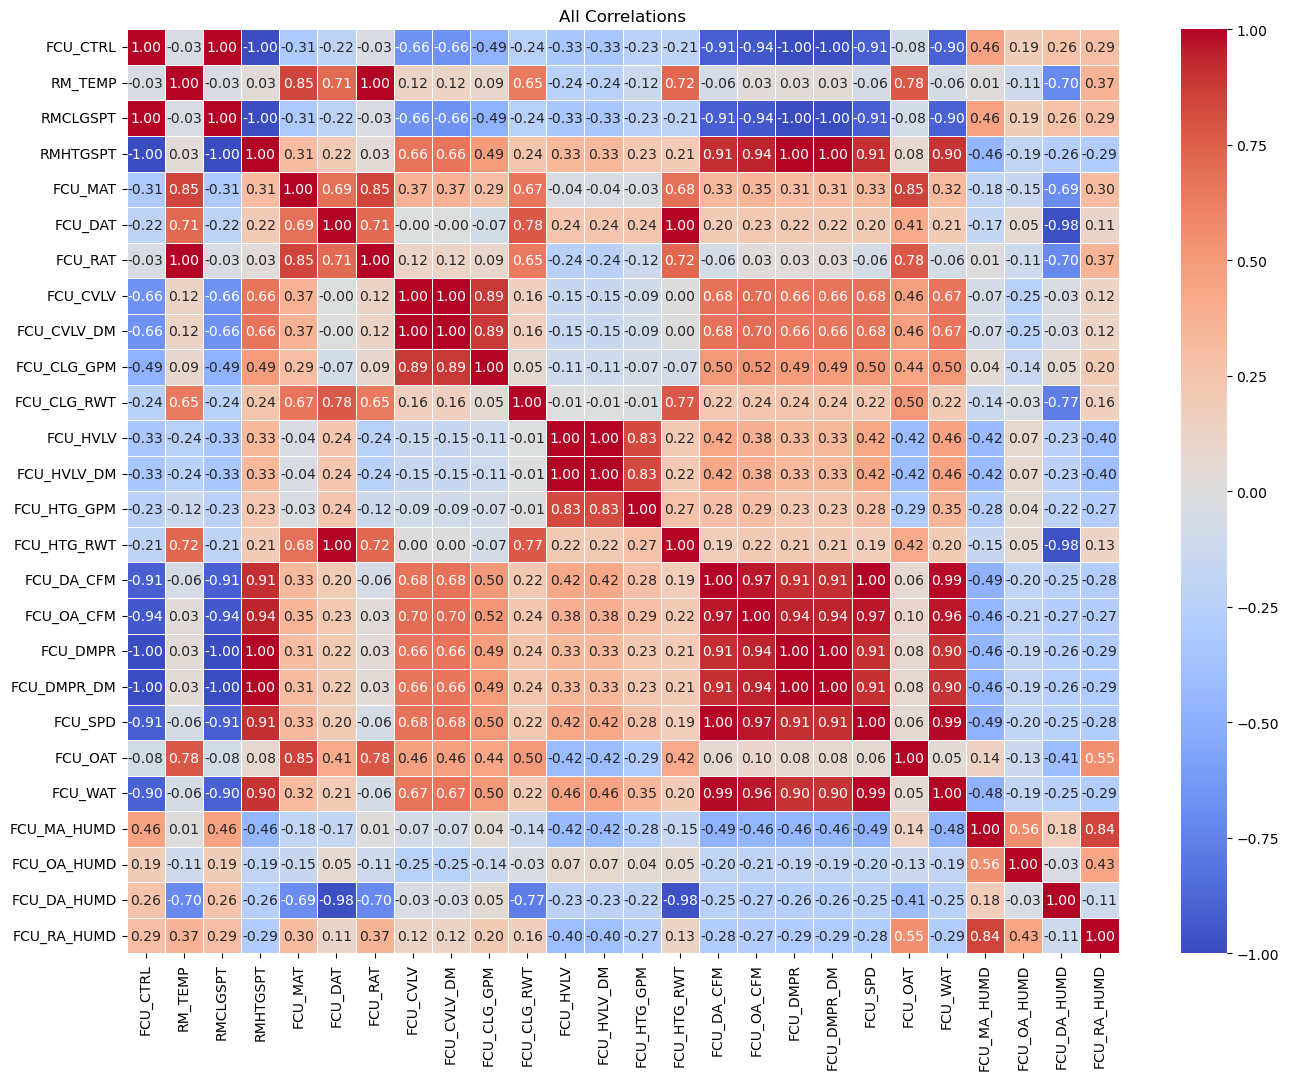

In [28]:
# In the heatmaps, we also observe how some variables have a correlation of 1. This indicates that some of them are prescindible. We will also remove these.
# First, we will plot a full correlation matrix (even though visually challenging) to spot all correlated variables

all_corr = scenario_clean.drop(columns = ["Datetime"]).corr()
plt.figure(figsize=(16,12))
sns.heatmap(all_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("All Correlations")
plt.show()

In [29]:
import numpy as np

# Get upper triangle of the correlation matrix
upper_triangle = all_corr.where(np.triu(np.ones(all_corr.shape), k=1).astype(bool))

# Find columns that have a perfect correlation (value = 1)
to_delete = []
for column in upper_triangle.columns:
    print(upper_triangle[column])
    if(any(upper_triangle[column] == 1)):
        print(column)

#to_delete = [column for column in upper_triangle.columns if any(upper_triangle[column] == 1)]

print("Columns to delete:", to_delete)

FCU_CTRL      NaN
RM_TEMP       NaN
RMCLGSPT      NaN
RMHTGSPT      NaN
FCU_MAT       NaN
FCU_DAT       NaN
FCU_RAT       NaN
FCU_CVLV      NaN
FCU_CVLV_DM   NaN
FCU_CLG_GPM   NaN
FCU_CLG_RWT   NaN
FCU_HVLV      NaN
FCU_HVLV_DM   NaN
FCU_HTG_GPM   NaN
FCU_HTG_RWT   NaN
FCU_DA_CFM    NaN
FCU_OA_CFM    NaN
FCU_DMPR      NaN
FCU_DMPR_DM   NaN
FCU_SPD       NaN
FCU_OAT       NaN
FCU_WAT       NaN
FCU_MA_HUMD   NaN
FCU_OA_HUMD   NaN
FCU_DA_HUMD   NaN
FCU_RA_HUMD   NaN
Name: FCU_CTRL, dtype: float64
FCU_CTRL      -0.032861
RM_TEMP             NaN
RMCLGSPT            NaN
RMHTGSPT            NaN
FCU_MAT             NaN
FCU_DAT             NaN
FCU_RAT             NaN
FCU_CVLV            NaN
FCU_CVLV_DM         NaN
FCU_CLG_GPM         NaN
FCU_CLG_RWT         NaN
FCU_HVLV            NaN
FCU_HVLV_DM         NaN
FCU_HTG_GPM         NaN
FCU_HTG_RWT         NaN
FCU_DA_CFM          NaN
FCU_OA_CFM          NaN
FCU_DMPR            NaN
FCU_DMPR_DM         NaN
FCU_SPD             NaN
FCU_OAT             N

In [30]:
scenario_clean = scenario_clean.drop(columns = to_delete)

In [33]:
# Crop and save also regular scenario (keeping all columns) but also deleting half year
# As seen in the charts above (monthly teperatures), months February-August cover all inside and outside temperature values
# To reduce the volumne of the data when melting it, we will only use this specific months to perform the analysis
scenario_half = scenario_clean[(scenario_clean["Datetime"].dt.month >= 2) & 
                             (scenario_clean["Datetime"].dt.month <= 8)]
scenario_half

,Datetime,FCU_CTRL,RM_TEMP,RMCLGSPT,RMHTGSPT,FCU_MAT,FCU_DAT,FCU_RAT,FCU_CVLV,FCU_CVLV_DM,...,FCU_OA_CFM,FCU_DMPR,FCU_DMPR_DM,FCU_SPD,FCU_OAT,FCU_WAT,FCU_MA_HUMD,FCU_OA_HUMD,FCU_DA_HUMD,FCU_RA_HUMD
44640,2018-02-01 00:00:00,2,64.96,85.0,55.0,40.76,58.33,64.96,0.0,0.0,...,0.88,0.0,0.0,0.0,16.56,0.0,100.00,84.14,71.35,87.79
44641,2018-02-01 00:01:00,2,64.95,85.0,55.0,40.71,58.29,64.95,0.0,0.0,...,0.88,0.0,0.0,0.0,16.47,0.0,100.00,83.74,71.42,87.81
44642,2018-02-01 00:02:00,2,64.93,85.0,55.0,40.65,58.26,64.93,0.0,0.0,...,0.88,0.0,0.0,0.0,16.38,0.0,100.00,83.28,71.49,87.83
44643,2018-02-01 00:03:00,2,64.92,85.0,55.0,40.60,58.23,64.92,0.0,0.0,...,0.88,0.0,0.0,0.0,16.28,0.0,100.00,82.79,71.56,87.85
44644,2018-02-01 00:04:00,2,64.91,85.0,55.0,40.55,58.20,64.91,0.0,0.0,...,0.88,0.0,0.0,0.0,16.19,0.0,100.00,82.30,71.63,87.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349915,2018-08-31 23:55:00,2,75.82,85.0,55.0,74.58,69.05,75.82,0.0,0.0,...,0.88,0.0,0.0,0.0,73.34,0.0,82.89,84.21,48.90,81.67
349916,2018-08-31 23:56:00,2,75.82,85.0,55.0,74.57,69.06,75.82,0.0,0.0,...,0.88,0.0,0.0,0.0,73.32,0.0,82.88,84.17,48.90,81.68
349917,2018-08-31 23:57:00,2,75.82,85.0,55.0,74.56,69.06,75.82,0.0,0.0,...,0.88,0.0,0.0,0.0,73.30,0.0,82.87,84.13,48.90,81.69
349918,2018-08-31 23:58:00,2,75.82,85.0,55.0,74.54,69.08,75.82,0.0,0.0,...,0.88,0.0,0.0,0.0,73.27,0.0,82.87,84.10,48.86,81.71


In [34]:
scenario_downsampled = scenario_half.resample("10min", on="Datetime").mean().reset_index()
scenario_downsampled

,Datetime,FCU_CTRL,RM_TEMP,RMCLGSPT,RMHTGSPT,FCU_MAT,FCU_DAT,FCU_RAT,FCU_CVLV,FCU_CVLV_DM,...,FCU_OA_CFM,FCU_DMPR,FCU_DMPR_DM,FCU_SPD,FCU_OAT,FCU_WAT,FCU_MA_HUMD,FCU_OA_HUMD,FCU_DA_HUMD,FCU_RA_HUMD
0,2018-02-01 00:00:00,2.0,64.898,85.0,55.0,40.520,58.186,64.898,0.0,0.0,...,0.88,0.0,0.0,0.0,16.144,0.0,100.000,82.015,71.668,87.883
1,2018-02-01 00:10:00,2.0,64.754,85.0,55.0,39.984,57.874,64.754,0.0,0.0,...,0.88,0.0,0.0,0.0,15.214,0.0,100.000,76.755,72.390,88.086
2,2018-02-01 00:20:00,2.0,64.608,85.0,55.0,39.446,57.558,64.608,0.0,0.0,...,0.88,0.0,0.0,0.0,14.284,0.0,100.000,71.091,73.137,88.264
3,2018-02-01 00:30:00,2.0,64.463,85.0,55.0,38.909,57.235,64.463,0.0,0.0,...,0.88,0.0,0.0,0.0,13.354,0.0,100.000,65.328,73.912,88.411
4,2018-02-01 00:40:00,2.0,64.318,85.0,55.0,38.371,56.909,64.318,0.0,0.0,...,0.88,0.0,0.0,0.0,12.424,0.0,100.000,59.767,74.713,88.525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30523,2018-08-31 23:10:00,2.0,75.970,85.0,55.0,75.082,68.763,75.970,0.0,0.0,...,0.88,0.0,0.0,0.0,74.190,0.0,82.702,84.538,49.449,80.966
30524,2018-08-31 23:20:00,2.0,75.908,85.0,55.0,74.946,68.875,75.908,0.0,0.0,...,0.88,0.0,0.0,0.0,73.985,0.0,82.896,84.690,49.234,81.204
30525,2018-08-31 23:30:00,2.0,75.868,85.0,55.0,74.822,68.962,75.868,0.0,0.0,...,0.88,0.0,0.0,0.0,73.777,0.0,82.977,84.672,49.075,81.387
30526,2018-08-31 23:40:00,2.0,75.841,85.0,55.0,74.703,69.020,75.841,0.0,0.0,...,0.88,0.0,0.0,0.0,73.565,0.0,82.970,84.508,48.967,81.536


In [1]:
scenario_downsampled.nunique()[scenario.nunique() == 1].index.tolist()

NameError: name 'scenario_downsampled' is not defined

In [36]:
## Melt data for CSV format
melted_scenario = scenario_downsampled.melt(id_vars=["Datetime"], var_name="sensor_id", value_name="measurement")
melted_scenario['unique_id'] = melted_scenario["sensor_id"] + '_' + melted_scenario["Datetime"].astype(str)
melted_scenario

,Datetime,sensor_id,measurement,unique_id
0,2018-02-01 00:00:00,FCU_CTRL,2.000,FCU_CTRL_2018-02-01 00:00:00
1,2018-02-01 00:10:00,FCU_CTRL,2.000,FCU_CTRL_2018-02-01 00:10:00
2,2018-02-01 00:20:00,FCU_CTRL,2.000,FCU_CTRL_2018-02-01 00:20:00
3,2018-02-01 00:30:00,FCU_CTRL,2.000,FCU_CTRL_2018-02-01 00:30:00
4,2018-02-01 00:40:00,FCU_CTRL,2.000,FCU_CTRL_2018-02-01 00:40:00
...,...,...,...,...
793723,2018-08-31 23:10:00,FCU_RA_HUMD,80.966,FCU_RA_HUMD_2018-08-31 23:10:00
793724,2018-08-31 23:20:00,FCU_RA_HUMD,81.204,FCU_RA_HUMD_2018-08-31 23:20:00
793725,2018-08-31 23:30:00,FCU_RA_HUMD,81.387,FCU_RA_HUMD_2018-08-31 23:30:00
793726,2018-08-31 23:40:00,FCU_RA_HUMD,81.536,FCU_RA_HUMD_2018-08-31 23:40:00


In [ ]:
melted_scenario.to_csv("measurements_LBNL.csv")

In [38]:
melted_scenario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793728 entries, 0 to 793727
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Datetime     793728 non-null  datetime64[ns]
 1   sensor_id    793728 non-null  object        
 2   measurement  793728 non-null  float64       
 3   unique_id    793728 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 24.2+ MB
